# Instructions
On this first assignment, applying the basic functions of the Igraph package is required. The following datasets are going to be used:

* Actors dataset - undirected graph - : For the 2005 Graph Drawing conference a data set was provided of the IMDB movie database. We will use a reduced version of this dataset, which derived all actor-actor collaboration edges where the actors co-starred in at least 2 movies together between 1995 and 2004. 


You have to complete the code chunks in this document but also analyze the results, extract insights and answer the short questions. Fill the CSV attached with your answers, sometimes just the number is enough, some others just a small sentence or paragraph. Remember to change the header with your email.

In your submission please upload both this document in HTML and the CSV with the solutions.


# Loading data

In this section, the goal is loading the datasets given, building the graph and analyzing basics metrics. Include the edge or node attributes you consider.

Describe the values provided by summary function on the graph object.

**1) How many nodes are there?**

**2) How many edges are there?**

In [1]:
from igraph import *
import cairo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_keys = "../Individual Assignment/imdb_actors_key.tsv"
path_edges = "../Individual Assignment/imdb_actor_edges.tsv"

In [3]:
# 2
edges = pd.read_csv(path_edges, sep="\t", encoding="windows 1252").sort_values(by='from')
edges

,from,to,weight
60663,0,25,3
60664,0,10,2
60665,0,8,2
190275,1,12182,2
190296,1,8,3
...,...,...,...
177133,17899,11661,2
265392,17904,17903,10
218306,17905,17085,2
218305,17905,17598,2


In [4]:
keys = pd.read_csv(path_keys, sep="\t", encoding="windows 1252")
keys.set_index('id')

,name,movies_95_04,main_genre,genres
id,,,,
15629,"Rudder, Michael (I)",12,Thriller,"Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N..."
5026,"Morgan, Debbi",16,Drama,"Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3..."
11252,"Bellows, Gil",33,Drama,"Comedy:6,Documentary:1,Drama:7,Family:1,Fantas..."
5150,"Dray, Albert",20,Comedy,"Comedy:6,Crime:1,Documentary:1,Drama:4,NULL:5,..."
4057,"Daly, Shane (I)",18,Drama,"Comedy:2,Crime:1,Drama:7,Horror:1,Music:1,Musi..."
...,...,...,...,...
16211,"Urrutia, Paulina",10,Romance,"Comedy:1,Drama:2,NULL:4,Romance:2,Short:1"
4910,"Kay, Lisa (I)",10,Comedy,"Comedy:5,Drama:1,Fantasy:1,NULL:2,Romance:1"
5746,"Sutherland, Kiefer",43,Drama,"Action:2,Comedy:3,Documentary:10,Drama:7,Famil..."


In [5]:
# 1
nr_of_nodes1 = keys.name.nunique()
nr_of_nodes1

17577

In [6]:
# Just a check
nr_of_nodes2 = keys.id.nunique()
nr_of_nodes2

17577

In [7]:
# Just a check
nr_of_nodes3 = edges['from'].nunique()
nr_of_nodes3

16084

In [8]:
# Just a check
nr_of_nodes4 = edges.to.nunique()
nr_of_nodes4

16087

There are 17577 nodes because there are that many names.

There are 287074 edges because there are that many rows in 'edges.tsv'.

# Degree distribution

Analyse the degree distribution. Compute the total degree distribution.

**3) What does this distribution look like?**

**4) What is the maximum degree?**

**5) What is the minum degree?**

In [9]:
g1 = Graph.DataFrame(edges, directed=False)

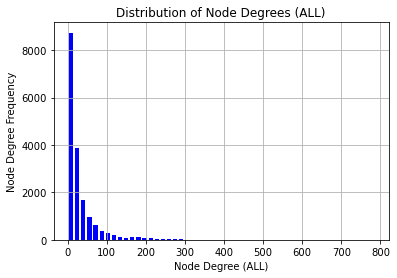

In [10]:
# 3
plt.hist(g1.degree(mode='all', loops=False), bins=50, rwidth=0.7, color='blue')
plt.xlabel('Node Degree (ALL)') 
plt.ylabel('Node Degree Frequency')
plt.title('Distribution of Node Degrees (ALL)')
plt.grid(True)

plt.show()

Since the graph is undirected, the histograms of in-coming and out-going edges is the same

In [11]:
# 4
max_deg = max(g1.degree(mode='all', loops=False))
max_deg

784

In [12]:
# 5
min_deg = min(g1.degree(mode='all', loops=False))
min_deg

1

# Network Diameter and Average Path Length

You have functions in igraph to calculate the diameter and the average path length. Think if you should consider the weights, the directions, etc.

**6) What is the diameter of the graph?**

**7) What is the avg path length of the graph?**

In [13]:
# 6
g1_diam = g1.diameter(directed=False)
g1_diam

16

In [14]:
# 7
g1_apl = g1.average_path_length(directed=False)
g1_apl

4.890545545798965

# Node importance: Centrality measures

(Optional but recommended): Obtain the distribution of the number of movies made by an actor and the number of genres in which an actor starred in. It may be useful to analyze and discuss the results to be obtained in the following exercises.

In [15]:
movies_per_actor = keys[['name', 'movies_95_04']]
movies_per_actor.sort_values(by=['movies_95_04'], ascending=False).head(3)

,name,movies_95_04
12147,"Davis, Mark (V)",540
1761,"Sanders, Alex (I)",467
13442,"North, Peter (I)",460


Obtaining number of genres per actor:
Take genres string, split it and make it a list of strings, compute the length of this list of strings.

In [16]:
keys['genres_per_actor'] = keys.genres.apply(lambda x: len(x.split(',')) )
keys.head(3)

,id,name,movies_95_04,main_genre,genres,genres_per_actor
0,15629,"Rudder, Michael (I)",12,Thriller,"Action:1,Comedy:1,Drama:1,Fantasy:1,Horror:1,N...",10
1,5026,"Morgan, Debbi",16,Drama,"Comedy:2,Documentary:1,Drama:6,Horror:2,NULL:3...",6
2,11252,"Bellows, Gil",33,Drama,"Comedy:6,Documentary:1,Drama:7,Family:1,Fantas...",11


Obtain three vectors with the degree, betweeness and closeness for each vertex of the actors' graph.

In [ ]:
degree_vec = g1.degree(mode='all', loops=False)
btwn_vec = g1.betweenness()
close_vec = g1.closeness(mode='all')

Sorting the keys DataFrame by ids so we can have matching names and ids after inserting the vectors.

In [18]:
keys_sorted = keys.sort_values(by=['id'], ascending=True)
keys_sorted.head(3)

,id,name,movies_95_04,main_genre,genres,genres_per_actor
9431,0,"Tordy, Géza",10,Comedy,"Adventure:1,Animation:1,Comedy:2,Family:1,NULL...",7
6480,1,"Reviczky, Gábor",17,Comedy,"Comedy:7,Crime:2,Fantasy:1,Musical:1,NULL:2,Ro...",8
4129,2,"Kállai, Ferenc",15,Drama,"Action:1,Comedy:4,Crime:1,Drama:4,Family:1,NUL...",7


Inserting the three vectors as columns into the keys_sorted DataFrame:

In [19]:
keys_sorted['degree'] = degree_vec
keys_sorted['betweenness'] = btwn_vec
keys_sorted['closeness'] = close_vec

keys_sorted.head(3)

,id,name,movies_95_04,main_genre,genres,genres_per_actor,degree,betweenness,closeness
9431,0,"Tordy, Géza",10,Comedy,"Adventure:1,Animation:1,Comedy:2,Family:1,NULL...",7,8,94.526366,0.168868
6480,1,"Reviczky, Gábor",17,Comedy,"Comedy:7,Crime:2,Fantasy:1,Musical:1,NULL:2,Ro...",8,40,9914.327130,0.168930
4129,2,"Kállai, Ferenc",15,Drama,"Action:1,Comedy:4,Crime:1,Drama:4,Family:1,NUL...",7,29,134403.550820,0.196873


Obtain the list of the 20 actors with the largest degree centrality. It can be useful to show a list with the degree, the name of the actor, the number of movies, the main genre, and the number of genres in which the actor has participated.

**8) Who is the actor with highest degree centrality?**

**9) How do you explain the high degree of the top-20 list??**

In [20]:
degree_df = keys_sorted[['name', 'degree', 'movies_95_04', 'main_genre', 'genres_per_actor']]
degree_df.sort_values(by=['degree'], ascending=False).head(20)

,name,degree,movies_95_04,main_genre,genres_per_actor
12147,"Davis, Mark (V)",784,540,Adult,10
1761,"Sanders, Alex (I)",610,467,Adult,10
13442,"North, Peter (I)",599,460,Adult,8
11272,"Marcus, Mr.",584,435,Adult,6
4092,"Tedeschi, Tony",561,364,Adult,11
8354,"Dough, Jon",555,300,Adult,8
5968,"Stone, Lee (II)",545,403,Adult,7
2236,"Voyeur, Vince",533,370,Adult,10
5752,"Lawrence, Joel (II)",500,315,Adult,7
15511,"Steele, Lexington",493,429,Adult,8


**Centrality Degree Explanation:**
- The (total) centrality degree of an actor is the number of actors they have starred in a movie with.
- The key to analyse the top 20 is twofold:
    1. With the exception of Mr. Tom Hanks, all the actors in the top 20 list belong to the **Adult movie industry**. 
    2. Actors in this industry act in a **significantly higher number of movies** than actors in other industries. Let's be honest, the time it takes to produce a porn movie cannot be compared to other movie genres. 
- These two points allow the porn actors to quickly develop a very large "network" of co-stars. 
- We can also **infer a higher level of clustering in the Adult industry**, meaning that for example, an actor would not take very long to connect with all the possible other actors he/she can connect with.

Obtain the list of the 20 actors with the largest betweenness centrality. Show a list with the betweenness, the name of the actor, the number of movies, the main genre, and the number of genres in which the actor has participated.

**10) Who is the actor with highest betweeness?**

**11) How do you explain the high betweenness of the top-20 list?**

In [21]:
btwn_df = keys_sorted[['name', 'betweenness', 'movies_95_04', 'main_genre', 'genres_per_actor']]
btwn_df.sort_values(by=['betweenness'], ascending=False).head(20)

,name,betweenness,movies_95_04,main_genre,genres_per_actor
10548,"Jeremy, Ron",9.748544e+06,280,Adult,14
4693,"Chan, Jackie (I)",4.716909e+06,59,Comedy,12
2563,"Cruz, Penélope",4.330663e+06,46,Drama,13
14433,"Shahlavi, Darren",4.295503e+06,16,Action,9
15720,"Del Rosario, Monsour",4.267099e+06,20,Action,9
17458,"Depardieu, Gérard",4.037356e+06,56,Comedy,11
8799,"Bachchan, Amitabh",2.570247e+06,35,Romance,13
10412,"Jackson, Samuel L.",2.539614e+06,97,Drama,14
5517,"Soualem, Zinedine",2.368164e+06,65,Comedy,12
15894,"Del Rio, Olivia",2.316388e+06,84,Adult,6


**Centrality Betweenness Explanation:**
- Centrality betweenness represents the importance of an actor in terms of the number of actors who are connected to each other through that actor. High betweenness actors connect actor clusters together and are important for the average path lenth of the graph.
- In this case, the main genre doesnt affect much an actor's betweenness, but the number of genres they have acted does. The more versatile actors, who can star in movies of different genres, can breidge the sub-networks of actors who only specialise in one genre.
- On that note, it is interesting to see that many actors in the top 20 are bi-naitonals: Jackie Chan, Penélope Cruz, Gérard Depardieu and Zinedine Soualem, to name a few. This means that they bridge many movie industries: from their home country to Hollywood in the US.

Obtain the list of the 20 actors with the largest closeness centrality. Show a list with the closeness the name of the actor, the number of movies, the main genre, and the number of genres in which the actor has participated.

**12) Who is the actor with highest closeness centrality?**

**13) How do you explain the high closeness of the top-20 list?**

Important here:
we have to trim the close_df by removing all closeness = 1 because, by definition, this is not possible in this case

In [22]:
close_df = keys_sorted[['name', 'closeness', 'movies_95_04', 'main_genre', 'genres_per_actor']]
close_df[close_df['closeness'] < 1].sort_values(by=['closeness'], ascending=False).head(20)

,name,closeness,movies_95_04,main_genre,genres_per_actor
2109,"Armanis, Julian",0.714286,12,Adult,2
14828,"Fazira, Erra",0.666667,13,Romance,4
17467,"Hassan, Jalaluddin",0.666667,14,Romance,5
6367,"Lee, Mark (X)",0.666667,10,Comedy,6
13001,"Lim, Kay Tong",0.666667,11,Drama,6
6659,"Bonnet, Sebastian",0.588235,17,Adult,4
12756,"Ridgeston, Lukas",0.588235,10,Adult,3
5377,"Davidov, Ion",0.588235,10,Adult,3
9514,"Sulik, Dano",0.588235,21,Adult,4
2567,"Kovac, Erik",0.588235,11,Adult,3


**Centrality Closeness Explanation:**
- Actors with highest closeness (< 1) are relatively concentrated in a small number of genres. 
- Probably with a high clustering coefficient.

In [24]:
!jupyter nbconvert --to html SNA1_actors_network_Felipe_Sanz_GitHub.ipynb

[NbConvertApp] Converting notebook Individual_Assignment_Felipe_Sanz.ipynb to html
[NbConvertApp] Writing 626792 bytes to Individual_Assignment_Felipe_Sanz.html


## The End